# training a small MLP on a sine wave in $[0, 2\pi)$.

In [157]:
import random
import math
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch.nn import Module, Linear, MSELoss
from torch.optim import Adam

In [158]:
dataset_size = 1000
xs = [random.random()*2*math.pi for _ in range(dataset_size)]
ys = [math.sin(x) for x in xs]
dataset = zip(xs, ys)

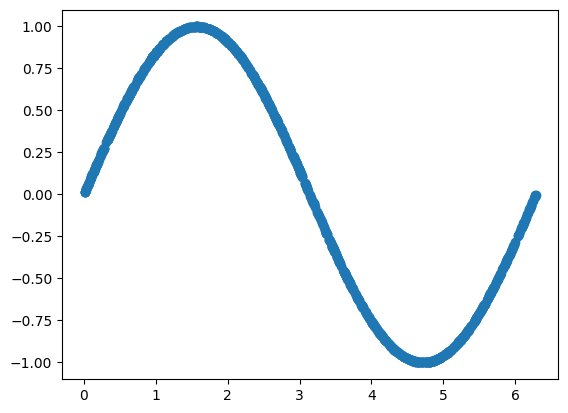

In [159]:
plt.plot(xs, ys, 'o')
plt.show()

In [160]:
class MiniModel(Module):
    def __init__(self):
        super().__init__()
        
        self.lin1 = torch.nn.Linear(1, 10)
        self.lin2 = torch.nn.Linear(10, 100)
        self.lin3 = torch.nn.Linear(100, 100)
        self.lin4 = torch.nn.Linear(100, 100)
        self.lin5 = torch.nn.Linear(100, 100)
        self.lin6 = torch.nn.Linear(100, 100)
        self.lin7 = torch.nn.Linear(100, 100)
        self.lin8 = torch.nn.Linear(100, 10)
        self.lin9 = torch.nn.Linear(10, 5)
        self.lin10 = torch.nn.Linear(5, 1)
        
    def forward(self, data):
        y_hat = data
        
        y_hat = self.lin1(y_hat)
        y_hat = torch.tanh(y_hat)
        y_hat = self.lin2(y_hat)
        y_hat = torch.tanh(y_hat)
        y_hat = self.lin3(y_hat)
        y_hat = torch.tanh(y_hat)
        y_hat = self.lin4(y_hat)
        y_hat = torch.tanh(y_hat)
        y_hat = self.lin5(y_hat)
        y_hat = torch.tanh(y_hat)
        y_hat = self.lin6(y_hat)
        y_hat = torch.tanh(y_hat)
        y_hat = self.lin7(y_hat)
        y_hat = torch.tanh(y_hat)
        y_hat = self.lin8(y_hat)
        y_hat = torch.tanh(y_hat)
        y_hat = self.lin9(y_hat)
        y_hat = torch.tanh(y_hat)
        y_hat = self.lin10(y_hat)
        
        return y_hat

In [161]:
num_epochs = 10
losses = []

loss_fn = MSELoss()

model = MiniModel()
optim = Adam(model.parameters(), lr=0.0001)
model.train()

MiniModel(
  (lin1): Linear(in_features=1, out_features=10, bias=True)
  (lin2): Linear(in_features=10, out_features=100, bias=True)
  (lin3): Linear(in_features=100, out_features=100, bias=True)
  (lin4): Linear(in_features=100, out_features=100, bias=True)
  (lin5): Linear(in_features=100, out_features=100, bias=True)
  (lin6): Linear(in_features=100, out_features=100, bias=True)
  (lin7): Linear(in_features=100, out_features=100, bias=True)
  (lin8): Linear(in_features=100, out_features=10, bias=True)
  (lin9): Linear(in_features=10, out_features=5, bias=True)
  (lin10): Linear(in_features=5, out_features=1, bias=True)
)

In [162]:
for _ in range(100):
    for data in dataset:
        optim.zero_grad()
        
        x = torch.tensor(data[0])
        y = torch.tensor(data[1])
        
        x.unsqueeze_(dim=0)
        y.unsqueeze_(dim=0)
        
        y_hat = model(x)
        
        loss = loss_fn(y_hat, y)
        
        losses.append(loss.item())
        
        loss.backward()
        
        optim.step()

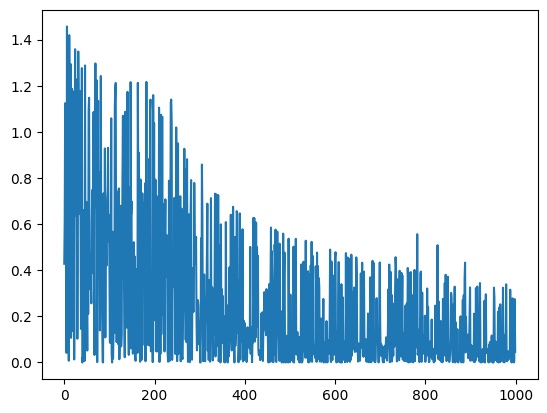

In [163]:
plt.plot(range(len(losses)), losses)
plt.show()

In [164]:
shape_xs = np.arange(0,2*math.pi, 0.01)
shape_ys = [model(torch.tensor(x, dtype=torch.float).unsqueeze_(dim=0)).item() for x in shape_xs]

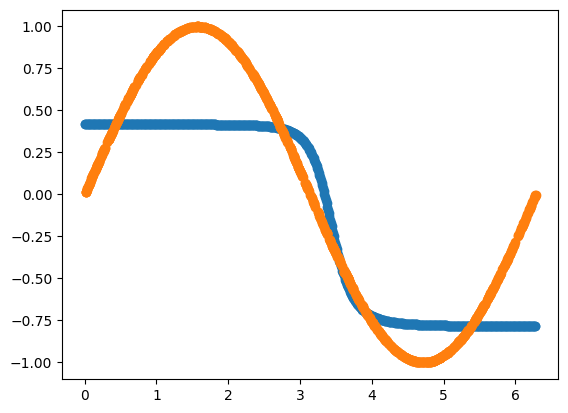

In [165]:
plt.plot(shape_xs, shape_ys, 'o')
plt.plot(xs, ys, 'o')
plt.show()